# Spectrum properties per bifurcation

Automatic computation of the peaks based on the fundamental frequency and its multiples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.fft import fft, fftfreq, fftshift
import scipy

In [2]:
def spectrum_peaks(xf, spectrum, height=300, distance=200):
    """
    Given a Fourier spectrum, compute the frequencies and heights 
    associated to the several peaks, assuming distributed as 
    multiples of the fundamental (highest) peak.
    """

    # Find peaks with the standard scipy function (indices, freqs, heights)
    local_max = (scipy.signal.find_peaks(spectrum, height=height, distance=distance)[0],)
    xf_local_max = xf[local_max]
    spectrum_local_max = spectrum[local_max]

    # Find index, frequency and height of the highest (fundamental)
    index1 = spectrum_local_max.argmax()
    f1 = xf_local_max[index1]
    h1 = spectrum_local_max[index1]

    # Loop checking the multiples of the fundamental
    freqs, heights = [f1], [h1]
    n = 2
    while n:
    
        # Find multiples of the fundamental frequency
        fn = n * f1
        close_index = np.where(np.isclose(xf_local_max,fn, rtol=1e-02))

        if not list(close_index[0]):
            break
    
        freq = xf_local_max[close_index][0]
        height = spectrum_local_max[close_index][0]
    
        # Append the values
        freqs.append(freq)
        heights.append(height)
        
        n += 1
    
        # Stop if no more maximums are found
        if fn > xf_local_max[-1]:
            n = False

    return np.array(freqs), np.array(heights)

In [3]:
def inv_irregularity(spectrum):

    if len(spectrum) == 1:
        return 0.0

    IRR = 0
    for k in range(1,len(spectrum)-1):
        k_contribution = 20 * np.log10(spectrum[k]) 
        k_contribution -= 1/3 * (20 * np.log10(spectrum[k+1])
                               + 20 * np.log10(spectrum[k])
                               + 20 * np.log10(spectrum[k-1]))
        IRR += np.abs(k_contribution)
    
    IRR = np.log10(IRR)
    
    return 1/IRR

In [4]:
def measures(xf, spectrum):
    
    center = spectrum @ xf / np.sum(spectrum)
    roughness = np.std(spectrum)
    iIRR = inv_irregularity(spectrum)
    
    return center, roughness, iIRR

In [5]:
folder = "Output_airflow"

## Van der Pol

In [6]:
with open(f"{folder}/VdP_fast_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [7]:
dt = tsol[1] - tsol[0]
vsol = np.diff(xsol)
len(xsol), len(vsol)

(441501, 441500)

In [8]:
start = np.argmax(xsol > 0.03)
end = np.argmax(xsol[::-1] > 0.03)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

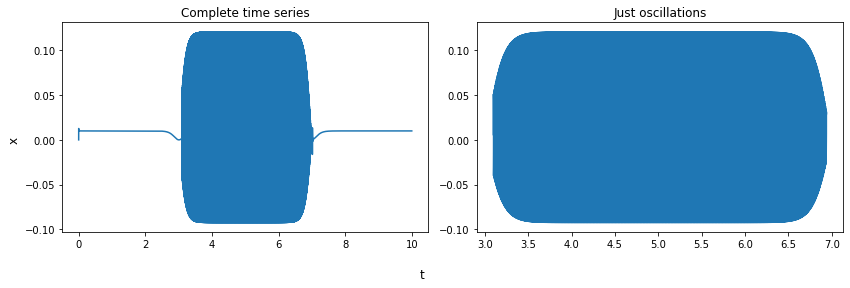

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

In [10]:
xf = fftfreq(len(xsol), dt)[:len(xsol)//2]
yf = fft(xsol)
spectrum = np.abs(yf)[:len(xsol)//2]

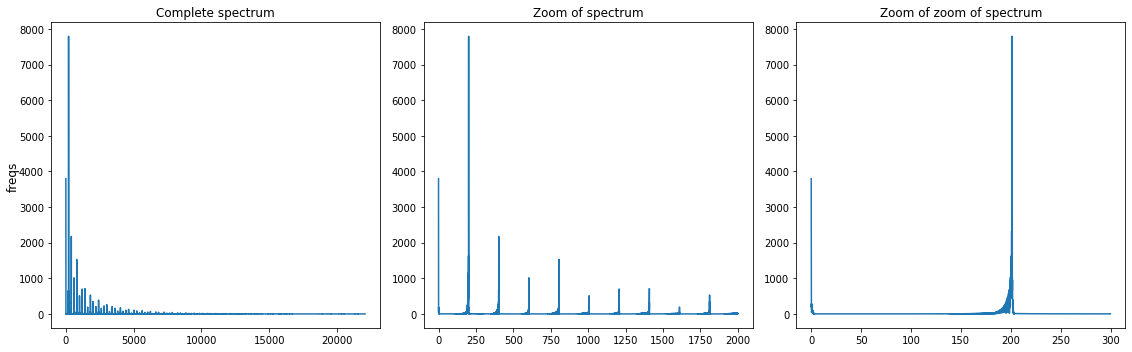

In [11]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:20000], spectrum[:20000])
ax[2].plot(xf[:3000], spectrum[:3000])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

In [12]:
freqs, heights = spectrum_peaks(xf,spectrum[:20000], height=150, distance=200)

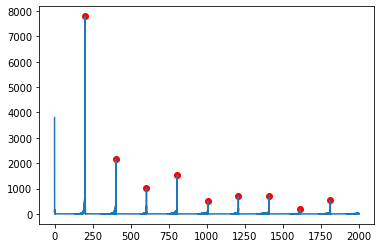

In [13]:
plt.plot(xf[:20000], spectrum[:20000])
plt.scatter(freqs, heights, color="red")

In [14]:
center, roughness, iIRR = measures(freqs, heights)
center, roughness, iIRR

(522.4479405360458, 2233.2492416395494, 0.7170943489735044)

## Hopf

In [15]:
with open(f"{folder}/Hopf_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [16]:
dt = tsol[1]-tsol[0]
vsol = np.array([xsol[i+1]-xsol[i] for i in range(len(tsol)-1)])

In [17]:
start = np.argmax(xsol > 0.01)
end = np.argmax(xsol[::-1] > 0.01)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

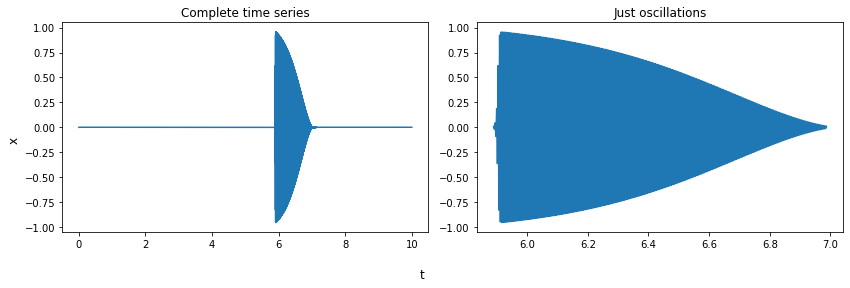

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

In [19]:
xf = fftfreq(len(xwindow), dt)[:len(xwindow)//2]
yf = fft(xwindow)
spectrum = np.abs(yf)[:len(xwindow)//2]

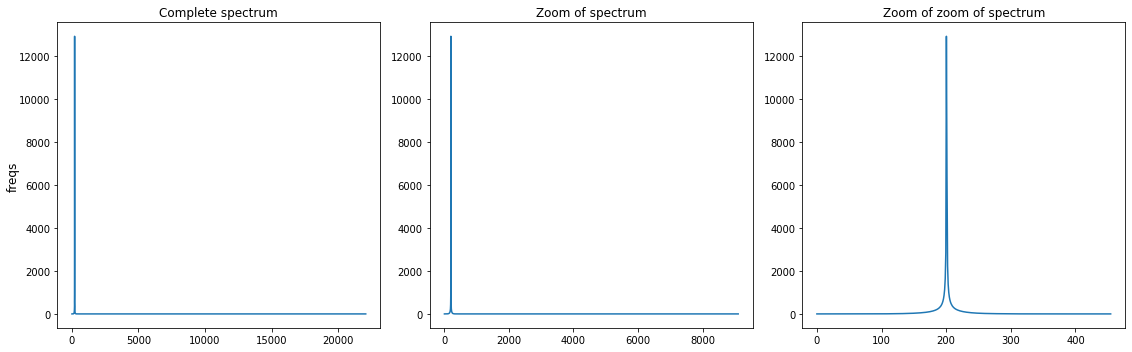

In [20]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:10000], spectrum[:10000])
ax[2].plot(xf[:500], spectrum[:500])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

In [21]:
freqs, heights = spectrum_peaks(xf,spectrum[:20000], height=150, distance=200)

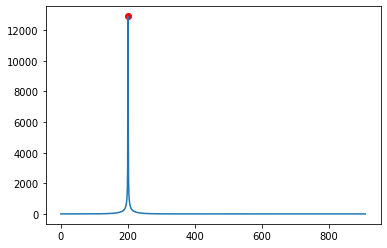

In [22]:
plt.plot(xf[:1000], spectrum[:1000])
plt.scatter(freqs, heights, color="red")

In [23]:
center, roughness, iIRR = measures(freqs, heights)
center, roughness, iIRR

(200.36719201254226, 0.0, 0.0)

## SNILC slow

In [24]:
with open(f"{folder}/SNILC_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [25]:
dt = tsol[1]-tsol[0]
vsol = np.array([xsol[i+1]-xsol[i] for i in range(len(tsol)-1)])

In [26]:
start = np.argmax(xsol[100:] > 0.99) + 100
end = np.argmax(xsol[::-1] < -0.99)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

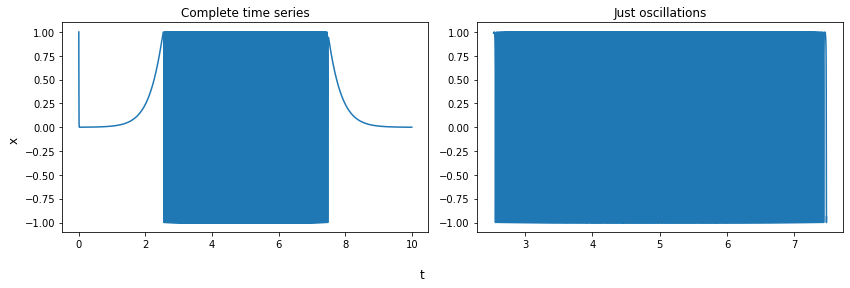

In [27]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

In [28]:
xf = fftfreq(len(xwindow), dt)[:len(xwindow)//2]
yf = fft(xwindow)
spectrum = np.abs(yf)[:len(xwindow)//2]

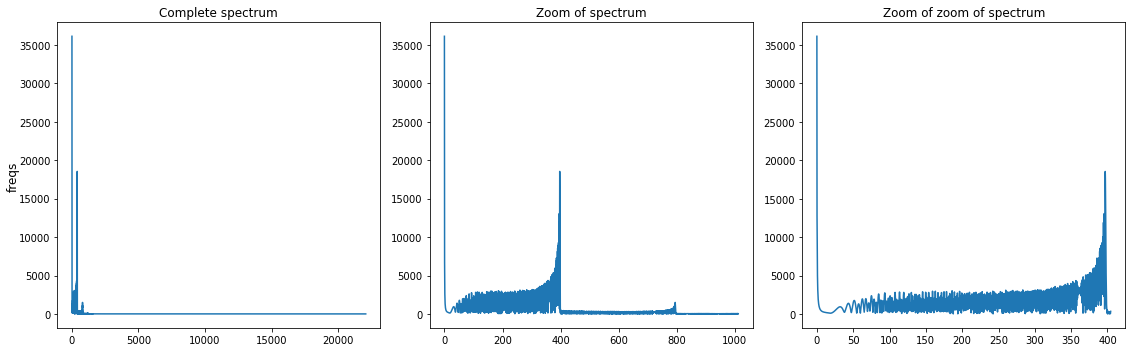

In [29]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:5000], spectrum[:5000])
ax[2].plot(xf[:2000], spectrum[:2000])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

In [30]:
freqs, heights = spectrum_peaks(xf,spectrum[:20000], height=300, distance=200)

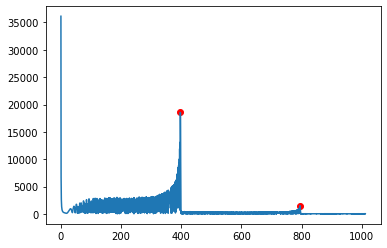

In [31]:
plt.plot(xf[:5000], spectrum[:5000])
plt.scatter(freqs, heights, color="red")

In [33]:
center, roughness, iIRR = measures(freqs,heights)
center, roughness, iIRR

/tmp/ipykernel_112048/2986280630.py:14: RuntimeWarning: divide by zero encountered in log10
  IRR = np.log10(IRR)


(426.55864836391413, 8527.324434102187, -0.0)

## SNILC fast

In [24]:
with open(f"{folder}/SNILC_fast_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [25]:
dt = tsol[1]-tsol[0]
vsol = np.array([xsol[i+1]-xsol[i] for i in range(len(tsol)-1)])

In [26]:
start = np.argmax(xsol[100:] > 0.99) + 100
end = np.argmax(xsol[::-1] < -0.99)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

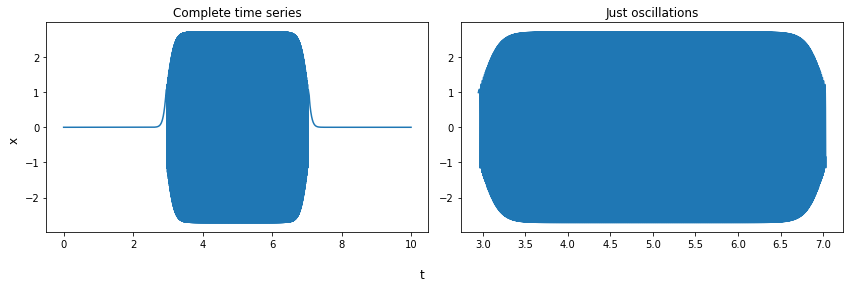

In [27]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

In [28]:
xf = fftfreq(len(xwindow), dt)[:len(xwindow)//2]
yf = fft(xwindow)
spectrum = np.abs(yf)[:len(xwindow)//2]

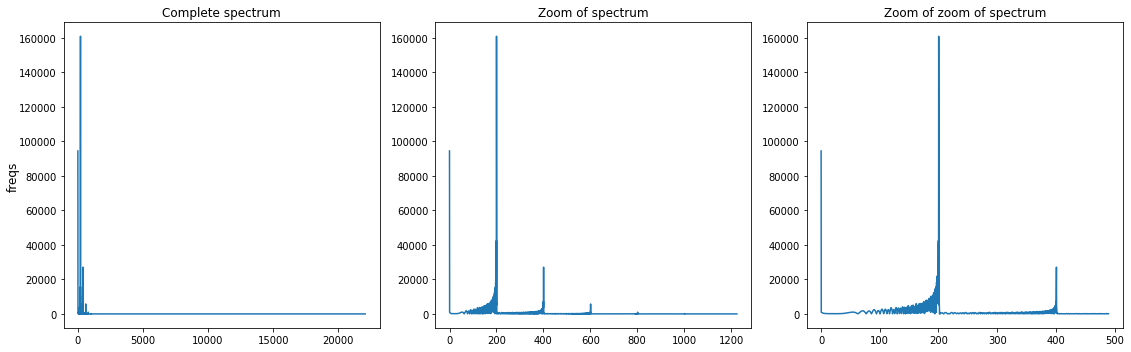

In [29]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:5000], spectrum[:5000])
ax[2].plot(xf[:2000], spectrum[:2000])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

In [30]:
freqs, heights = spectrum_peaks(xf,spectrum[:20000], height=150, distance=200)

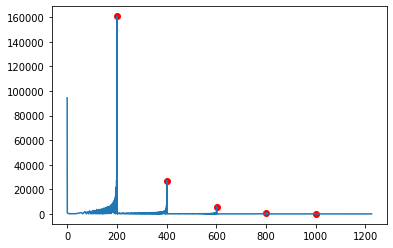

In [31]:
plt.plot(xf[:5000], spectrum[:5000])
plt.scatter(freqs, heights, color="red")

In [32]:
center, roughness, iIRR = measures(freqs, heights)
center, roughness, iIRR

(243.98033646990905, 61730.09886095315, 4.654778218512612)

## RECAP

Bifurcation: &emsp; Center, &emsp; roughness, &emsp; iIRR 

VdP: &emsp; 522.36, &emsp;  24550.193, &emsp; 0.717

Hopf: &emsp; 200.390, &emsp; 0.0, &emsp; 0.0

SNILC: &emsp;  248.967, &emsp; 21435.056, &emsp; 4.475